In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

## MLE estimation

Maximum Likelihood Estimation: assume we have the following Gaussian population, for which we want to estimate $\mu$ assuming we know $\sigma=4$. This is

$$x_i \sim \mathcal{N}(\mu, \sigma)\;\;\;\;\;\; P(x_i|\mu) = pdf_{\mathcal{N}(\mu,\sigma)}(x_i)$$

given a set of samples $D={x_0, ..., x_{n-1}}$

$$P(D|\mu) = \prod pdf_{\mathcal{N}(\mu,\sigma)}(x_i)$$

and we want to obtain $\hat{\mu}$, the estimation of $\mu$ that makes our observed data most probable,

$$ \begin{split}
\hat{\mu}_{MLE} &= \underset{\mu}{arg\;max} \;P(D|\mu) \\
          &= \underset{\mu}{arg\;max} \prod pdf_{\mathcal{N}(\mu,\sigma)}(x_i) \\
          &= \underset{\mu}{arg\;max} \log \Big[ \prod pdf_{\mathcal{N}(\mu,\sigma)}(x_i) \Big] \;\;\;\;\;since\;\log\;is\;monotonous\\
          &= \underset{\mu}{arg\;max} \sum \log \big[ pdf_{\mathcal{N}(\mu,\sigma)}(x_i) \big] \\
\end{split}
$$

and it is usually defined:

- likelihood: $\mathcal{L(\mu;D)} = \prod pdf_{\mathcal{N}(\mu,\sigma)}(x_i)$
- log likelihood: $\mathcal{l(\mu;D)} = \sum \log \big[ pdf_{\mathcal{N}(\mu,\sigma)}(x_i) \big]$

observe that the likelihood is a **function** and $P$ is a probability distribution, thus the change in notation and interpretation: $\mathcal{L(\mu;D)}$ vs. $P(D|\mu)$

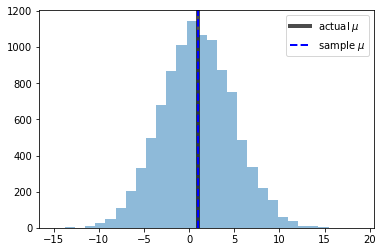

In [2]:
population_mu, population_sigma = 1, 4
x = np.random.normal(loc=population_mu, scale=population_sigma, size=10000)
plt.axvline(population_mu, color="black", alpha=.7, lw=4, label="actual $\mu$")
plt.axvline(np.mean(x), ls="--", color="blue", lw=2, label="sample $\mu$")
plt.hist(x, bins=30, alpha=.5);
plt.legend()

In [3]:
p_X_given_mu = lambda xi,mu: stats.norm(loc=mu, scale=population_sigma).pdf(xi)
mle_mu = lambda mu: np.sum(np.log(p_X_given_mu(x, mu)))
r = minimize(lambda k: -mle_mu(k), np.random.random()*10, method="BFGS")
print "actual mu   ", population_mu
print "MLE estimate", r.x[0]
print "sample mean ", np.mean(x)

actual mu    1
MLE estimate 0.9636857170095428
sample mean  0.9636855448341763


it can be shown that

$$\hat{\mu}_{MLE} = \hat{\mu} \;\;the\;sample\;mean$$

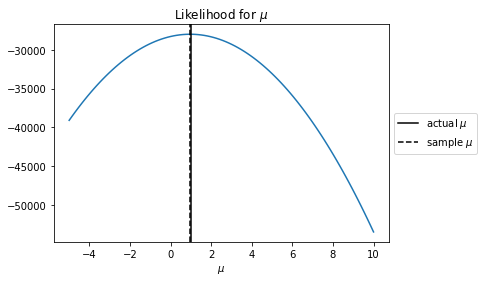

In [4]:
mu_range=np.linspace(-5,10,100)
plt.plot(mu_range, [mle_mu(mu) for mu in mu_range])
plt.axvline(population_mu, color="black", label="actual $\mu$")
plt.axvline(np.mean(x), color="black", label="sample $\mu$", ls="--")
plt.xlabel("$\mu$")
plt.title("Likelihood for $\mu$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Now we do the same, but assuming the population is normal and not knowing $\mu$ and $\sigma$. In this case, the likelihood and probability function are denoted by:

- $\mathcal{L}(\mu,\sigma;D)$
- $P(D|\mu,\sigma)$

In [5]:
x = np.random.normal(loc=population_mu, scale=population_sigma, size=10000)

p_X_given_mu_sigma = lambda xi,mu, sigma: stats.norm(loc=mu, scale=sigma).pdf(xi)
mle_mu_sigma       = lambda mu_sigma: np.sum(np.log(p_X_given_mu_sigma(x, mu_sigma[0], mu_sigma[1])))

cons=({'type': 'ineq', 'fun': lambda x: x[1]})

r = minimize(lambda k: -mle_mu_sigma(k), np.random.random(size=2)*100, constraints=cons, method="COBYLA")
print r
print "MLE estimate", r.x

     fun: 28143.680125868348
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 178
  status: 1
 success: True
       x: array([0.99185087, 4.03670343])
MLE estimate [0.99185087 4.03670343]


In [6]:
delta = 0.1
mus    = np.linspace(-1.0, 2.0, 10)
sigmas = np.linspace(3., 5.0, 20)
M,S = np.meshgrid(mus, sigmas)
Z = np.r_[[mle_mu_sigma([m,s]) for m,s in zip(M.flatten(),S.flatten())]].reshape(M.shape)

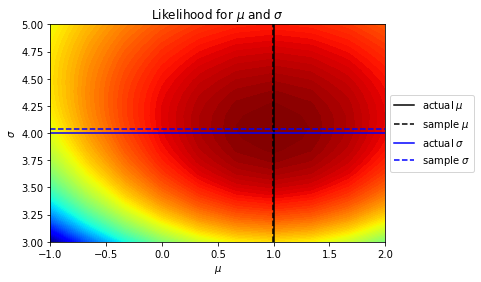

In [7]:
plt.contourf(M,S,Z, levels=np.linspace(np.min(Z), np.max(Z), 100), cmap=plt.cm.jet)
plt.axvline(population_mu, color="black", label="actual $\mu$")
plt.axvline(np.mean(x), color="black", label="sample $\mu$", ls="--")

plt.axhline(population_sigma, color="blue", label="actual $\sigma$")
plt.axhline(np.std(x), color="blue", ls="--", label="sample $\sigma$")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Likelihood for $\mu$ and $\sigma$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## MAP estimation

Using Bayes and a prior on $\mu$, we get a posterior distribution for $\mu$ in the light of the observed data $D$:

$$P(\mu|D) = \frac{P(D|\mu)P(\mu)}{P(D)}$$

and want to obtain the $\mu$ that has the greatest probability in the above posterior

$$\begin{split}
\hat{\mu}_{MAP} &=\underset{\mu}{arg\;max}\; \frac{P(D|\mu)P(\mu)}{P(D)}\\
                &=\underset{\mu}{arg\;max}\; P(D|\mu)P(\mu)\;\;\;\;\;since\;P(D)\;is\;constant\\
                &=\underset{\mu}{arg\;max}\; \Big[ \prod pdf_{\mathcal{N}(\mu,\sigma)}(x_i)\Big]P(\mu)\\
                &= \underset{\mu}{arg\;max}\; \log \Big[ P(\mu)\prod pdf_{\mathcal{N}(\mu,\sigma)}(x_i) \Big] \\
               &= \underset{\mu}{arg\;max}\; \log P(\mu)+\sum \log \big[ pdf_{\mathcal{N}(\mu,\sigma)}(x_i) \big] \\
\end{split}
$$

observe that 

- MLE obtains the $\mu$ that maximizes the probability of our observation, while MAP obtains the most probable $\mu$ given our observation and prior knowledge on $\mu$
- $\hat{\mu}_{MAP} = \hat{\mu}_{MLE}$ when the prior is uninformative, this is, $P(\mu)=k$, with $k$ constant
- if we could derive analitically $P(\mu|D)$ we could get confidence intervals, etc. but $P(D) = \int P(D|\mu)P(\mu)d\mu$ which is usually hard to derive.

## Comparison

**MLE** chooses parameters $\theta$ that maximize the probability of observed data:

$$\hat{\theta} = \underset{\theta}{\text{arg max }}P(\mathcal{D}|\theta)$$


**MAP** chooses parameters $\theta$ that are most probable given prior probabiity and the data

$$\hat{\theta} = \underset{\theta}{\text{arg max }}P(\theta|\mathcal{D}) = \underset{\theta}{\text{arg max }} \frac{P(\mathcal{D}|\theta)P(\theta)}{P(\mathcal{D})}$$

In [8]:
def map_estimate(x, population_sigma, prior_mu, prior_sigma):
    p_X_given_mu = lambda xi,mu: stats.norm(loc=mu, scale=population_sigma).pdf(xi)
    p_mu         = lambda mu: stats.norm(loc=prior_mu, scale=prior_sigma).pdf(mu)
    map_mu       = lambda mu: np.sum(np.log(p_X_given_mu(x, mu))+np.log(p_mu(mu)))
    r = minimize(lambda k: -map_mu(k), np.random.random()*10, method="BFGS")
    return r.x   

def map_experiment(population_mu, population_sigma, prior_mu, prior_sigma, n_samples):
    
    
    x = np.random.normal(loc=population_mu, scale=population_sigma, size=n_samples)
    emap=map_estimate(x, population_sigma, prior_mu, prior_sigma)
    
    plt.figure(figsize=(15,3))
    plt.subplot(121)

    plt.axvline(np.mean(x), ls="--", color="black", label="$\hat{\mu}_{MLE}$")
    plt.axvline(population_mu, color="black", label="actual $\mu$", lw=4, alpha=.5)
    plt.axvline(emap, color="red", label="$\hat{\mu}_{MAP}$")
    plt.hist(x, bins=30, alpha=.5);
    plt.legend()
    plt.title("data distribution")

    plt.subplot(122)
    p_mu         = lambda mu: stats.norm(loc=prior_mu, scale=prior_sigma).pdf(mu)
    mr = np.linspace(-2,5, 100)
    plt.plot(mr, [p_mu(i) for i in mr], label="prior on $\mu$")
    plt.axvline(np.mean(x), ls="--", color="black", label="$\hat{\mu}_{MLE}$")
    plt.axvline(population_mu, color="black", label="actual $\mu$", lw=4, alpha=.5)
    plt.axvline(emap, color="red", label="$\hat{\mu}_{MAP}$")
    plt.title("prior on $\mu$")
    plt.legend(loc="center left", bbox_to_anchor=(1,.5))
    print "MAP estimate", emap[0]
    print "MLE estimate", np.mean(x)

MAP estimation with a a very  focused but biased prior (we are very sure of our previous knowledge but wrong)

MAP estimate 3.8792974889151584
MLE estimate 1.948057442237916


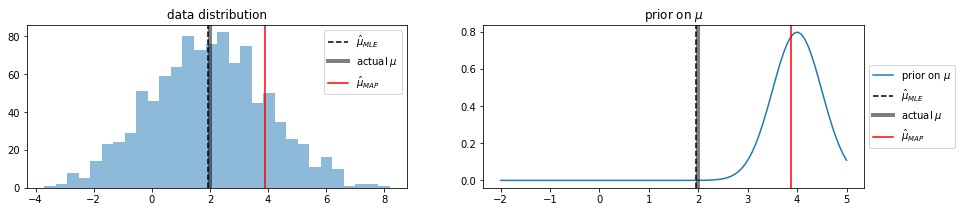

In [9]:
map_experiment(population_mu=2, population_sigma=2, prior_mu=4, prior_sigma=.5, n_samples=1000)

if we have little data we can use the previous knowledge encapsulated into the prior to help out

MAP estimate 2.0025813351155004
MLE estimate 2.012906661926468


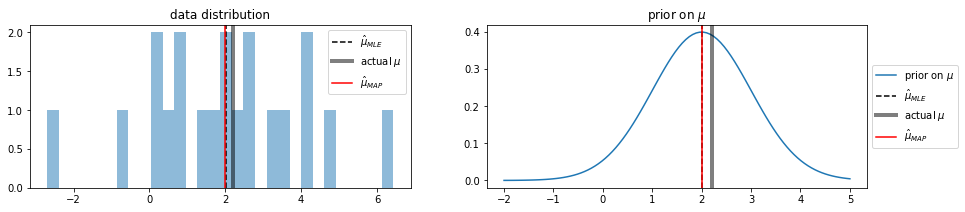

In [10]:
map_experiment(population_mu=2.2, population_sigma=2, prior_mu=2, prior_sigma=1, n_samples=20)

MAP estimation with an uninformative prior

MAP estimate 2.02666357313
MLE estimate 2.02665966882


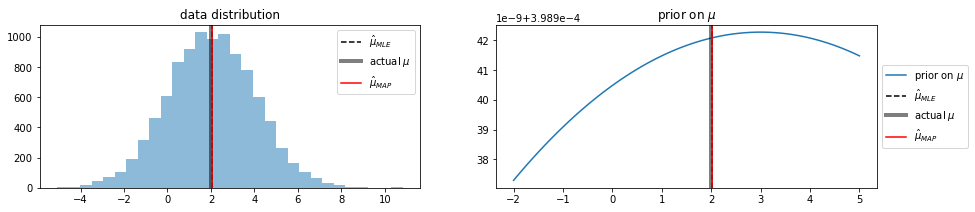

In [11]:
map_experiment(population_mu=2, population_sigma=2, prior_mu=3, prior_sigma=1000, n_samples=10000)